# Stock Price Prediction Project

In [1]:
from platform import python_version
print(python_version())

3.9.12


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sb
 
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [3]:
stock_df=pd.read_csv('Stock_Price_data_set.csv')

In [4]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


## Exploring Data

In [5]:
stock_df.shape

(1009, 7)

In [6]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [7]:
stock_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
stock_df.describe

<bound method NDFrame.describe of             Date        Open        High         Low       Close   Adj Close  \
0     2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1     2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2     2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3     2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4     2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...          ...         ...         ...         ...         ...         ...   
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

     

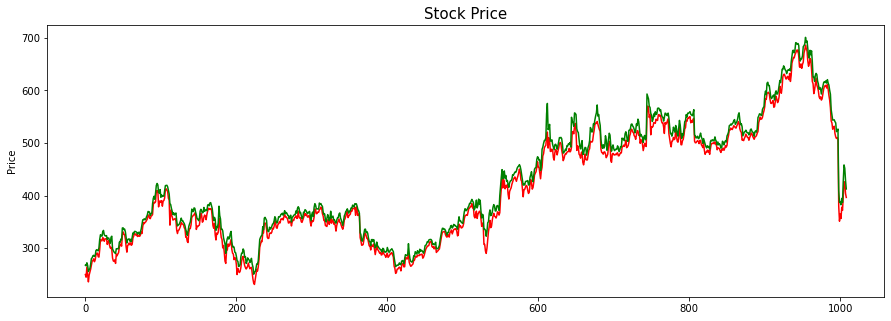

In [9]:
plt.figure(figsize=(15,5))
plt.plot(stock_df['Low'],color="red",label='Low')
plt.plot(stock_df['High'],color="green",label='High')
plt.title('Stock Price', fontsize=15)

plt.ylabel('Price')
plt.show()

## Missing Values

In [10]:
stock_df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

## Duplicates

In [11]:
stock_df.duplicated().sum()

0

## Column Data Type

In [12]:
stock_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

## Outliers

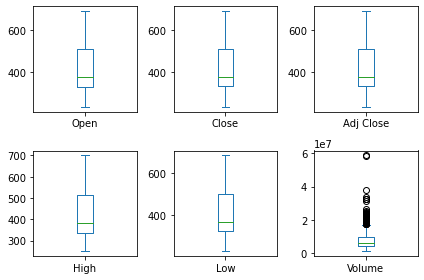

In [13]:
plt.subplot(2,3,1)
stock_df['Open'].plot(kind='box') 

plt.subplot(2,3,2)
stock_df['Close'].plot(kind='box')

plt.subplot(2,3,3)
stock_df['Adj Close'].plot(kind='box')

plt.subplot(2,3,4)
stock_df['High'].plot(kind='box')

plt.subplot(2,3,5)
stock_df['Low'].plot(kind='box')

plt.subplot(2,3,6)
stock_df['Volume'].plot(kind='box')

plt.tight_layout()

<AxesSubplot:>

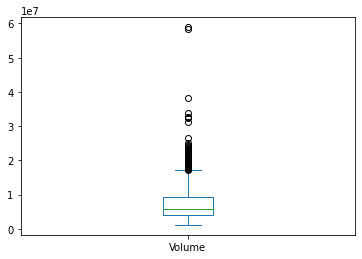

In [14]:
stock_df['Volume'].plot(kind='box')

In [15]:
def find_outlier_limits(col_name):
    Q1,Q3=stock_df[col_name].quantile([.25,.75])
    IQR=Q3-Q1
    low=Q1-(2* IQR)
    high=Q3+(1* IQR)
    return (high,low)

high_vol,low_vol=find_outlier_limits('Volume')
print('Volume: ','upper limit: ',high_vol,' lower limit: ',low_vol)

Volume:  upper limit:  14552900.0  lower limit:  -6369100.0


In [16]:
low_limit = 0
print('Volume: ','upper limit: ',high_vol,'lower limit: ',low_limit)

Volume:  upper limit:  14552900.0 lower limit:  0


In [17]:
#replacing outliers value
stock_df.loc[stock_df['Volume'] > high_vol,'Volume'] = high_vol

stock_df.loc[stock_df['Volume']>high_vol,'Volume']=high_vol

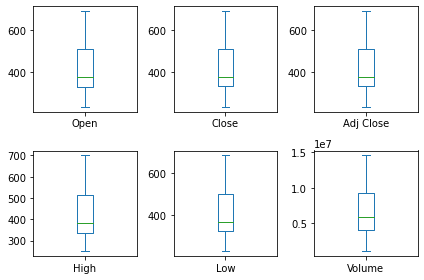

In [18]:
plt.subplot(2,3,1)
stock_df['Open'].plot(kind='box') 

plt.subplot(2,3,2)
stock_df['Close'].plot(kind='box')

plt.subplot(2,3,3)
stock_df['Adj Close'].plot(kind='box')

plt.subplot(2,3,4)
stock_df['High'].plot(kind='box')

plt.subplot(2,3,5)
stock_df['Low'].plot(kind='box')

plt.subplot(2,3,6)
stock_df['Volume'].plot(kind='box')

plt.tight_layout()

<AxesSubplot:>

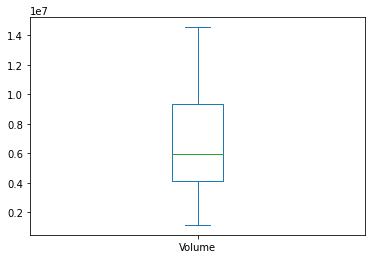

In [19]:
stock_df['Volume'].plot(kind='box')

In [20]:
outliers = [stock_df['Volume'] > high_vol,'Volume']
outliers[True]

'Volume'

## ML MODELING

In [21]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,14552900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,14552900
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,14552900
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [22]:
X = stock_df.iloc[:, 1:8]
X = pd.get_dummies(X)
X

,Open,High,Low,Close,Adj Close,Volume
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,249.470001,14552900
...,...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,427.140015,14552900
1005,432.959991,458.480011,425.540009,457.130005,457.130005,14552900
1006,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


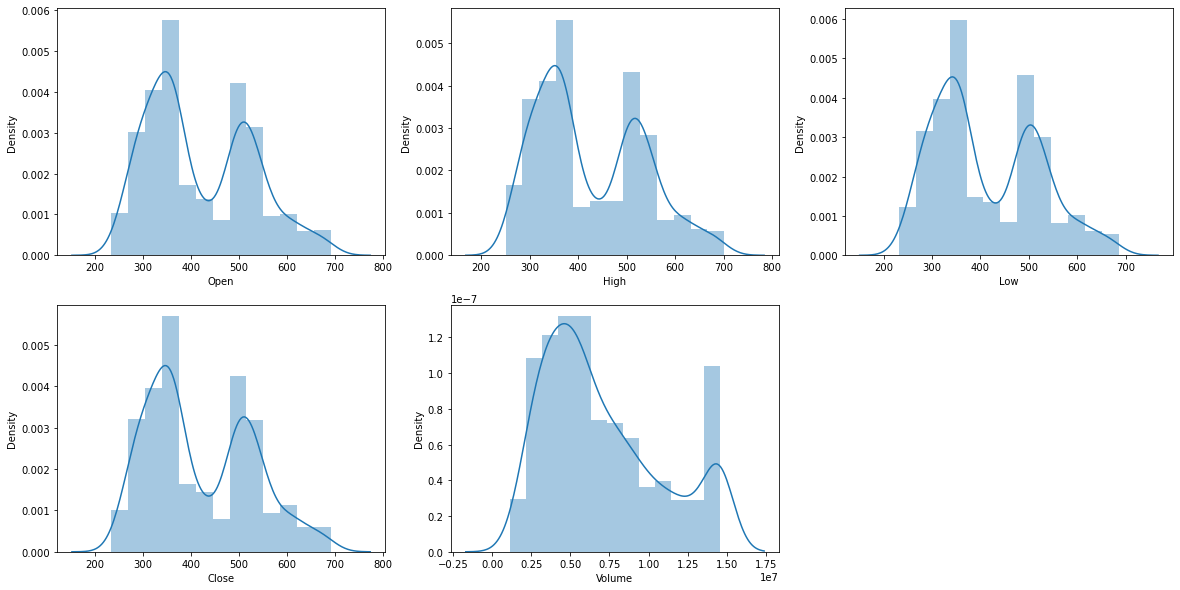

In [23]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(stock_df[col])
plt.show()

In [24]:
splitted = stock_df['Date'].str.split('-', expand=True)
 
stock_df['month'] = splitted[1].astype('int')
stock_df['year'] = splitted[0].astype('int')
stock_df['date'] = splitted[2].astype('int')
 
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,month,year,date
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2,2018,5
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2,2018,6
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2,2018,7
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2,2018,8
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,14552900,2,2018,9


In [25]:
stock_df['is_quarter_end'] = np.where(stock_df['month']%3==0,1,0)
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,month,year,date,is_quarter_end
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2,2018,5,0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2,2018,6,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2,2018,7,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2,2018,8,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,14552900,2,2018,9,0


In [26]:
df=stock_df

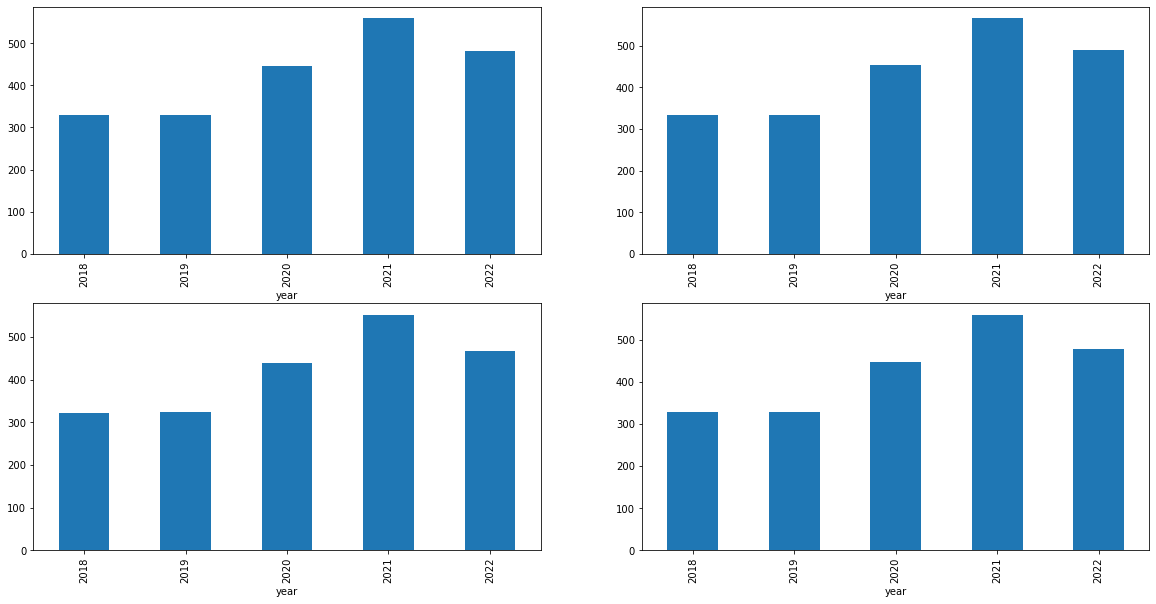

In [27]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [28]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Adj Close,Volume,month,year,date
is_quarter_end,,,,,,,,,
0,418.681368,424.889821,412.112068,418.699791,418.699791,7.260555e+06,6.087798,2019.622024,15.715774
1,419.814037,426.179910,412.896440,419.600831,419.600831,6.608711e+06,7.442136,2019.543027,15.721068


In [29]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

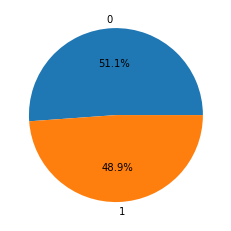

In [30]:
plt.pie(df['target'].value_counts().values,labels=[0, 1], autopct='%1.1f%%')
plt.show()

### Correlation

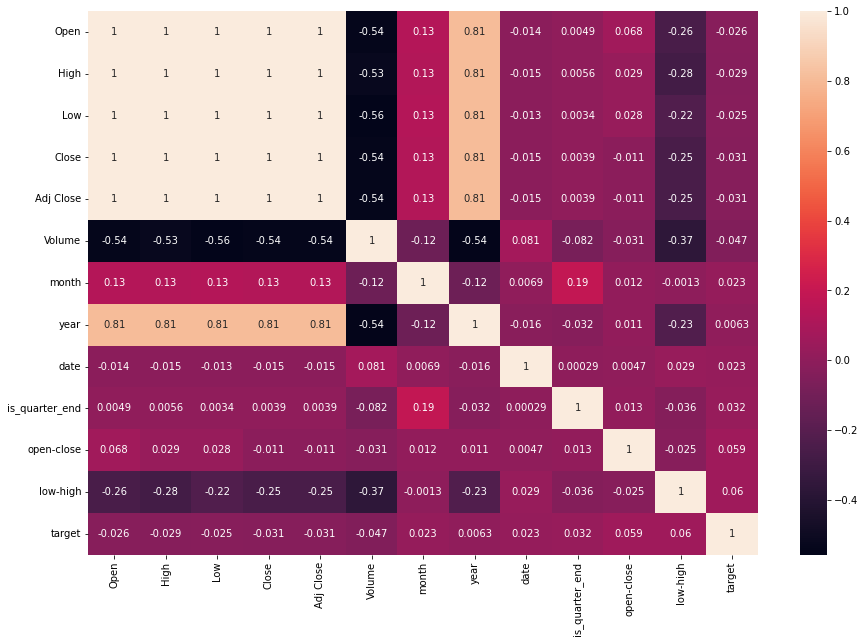

In [31]:
plt.figure(figsize=(15, 10))
sb.heatmap(df.corr(), annot=True)
plt.show()

## DATA SPLITTING AND NORMALISING

In [32]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=20)
print(X_train.shape, X_valid.shape)

(908, 3) (101, 3)


In [33]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True)]
 
for i in range(2):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5485939836482628
Validation Accuracy :  0.5407843137254902

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4612617248946459
Validation Accuracy :  0.5362745098039216



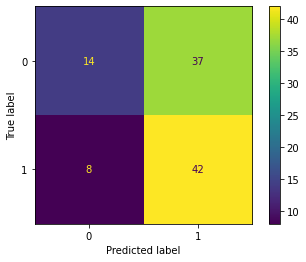

In [34]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()

We can observe that the accuracy achieved by the ML model is no better than simply guessing with a probability of 50%. Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.